<a href="https://colab.research.google.com/github/Fezzaioussama/PCA-from-scratch-using-Python/blob/main/TP01_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
PCA and the PCA kernel trick serve different purposes based on the nature of the data. PCA is a powerful tool for linear dimensionality reduction, while the PCA kernel trick extends its applicability to datasets with non-linear structures through the introduction of the RBF kernel. The choice between them depends on the underlying characteristics of the data and the desired outcomes.

The goal of this TD is to understand the difference between PCA and Kernel based PCA

To perform a PCA based dimension reduction, we need:
<p> 1. to compute the covariance matrix <b> C </b> of the original data <b> X </b>.</p>
<p> 2. to compute the the eigendecomposition of the computed matrix.</p>
<p> 3. to sort the eigen values according to a decreasing order.</p>
<p> 4. to construct the projection matrix <b> W </b> of the k first eigen values.</p>
<p> 5. to transform the data into the projected space $X_{pca} = W^TX $ </p>

Text(0.5, 0, 'x coordinate')

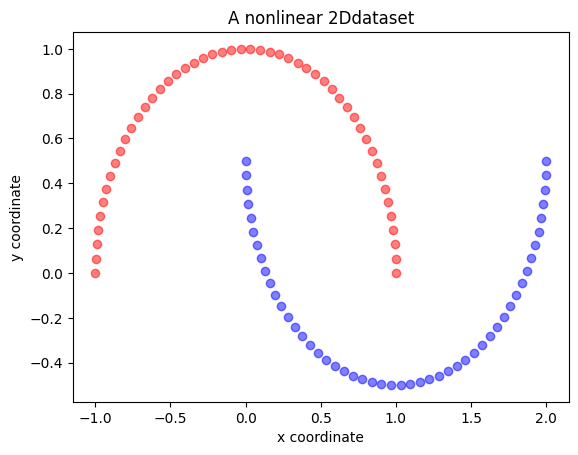

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')


In [3]:
print(X[y==1, 0])
print(y)

[0.71547241 1.46253829 0.32769911 0.         1.40478334 0.42788334
 1.09602303 0.19858638 1.1595999  0.07308324 1.03205158 1.76144596
 1.8713187  1.6234898  0.01844084 1.8380881  0.65463495 1.57211666
 1.71834935 1.96729486 1.99179001 0.28165065 1.80141362 0.1619119
 0.96794842 1.28452759 0.03270514 0.00205461 1.99794539 0.8404001
 1.94905575 0.1286813  0.77747907 0.3765102  0.00820999 0.23855404
 1.92691676 2.         0.53746171 0.05094425 0.59521666 1.34536505
 1.22252093 1.98155916 0.90397697 1.67230089 0.09903113 1.51839257
 1.90096887 0.48160743]
[0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1]


convaraince [[ 1.01       -0.06183682]
 [-0.06183682  0.30316318]]
Sorted Eigenvalues:
[0.29779423 1.01536894]


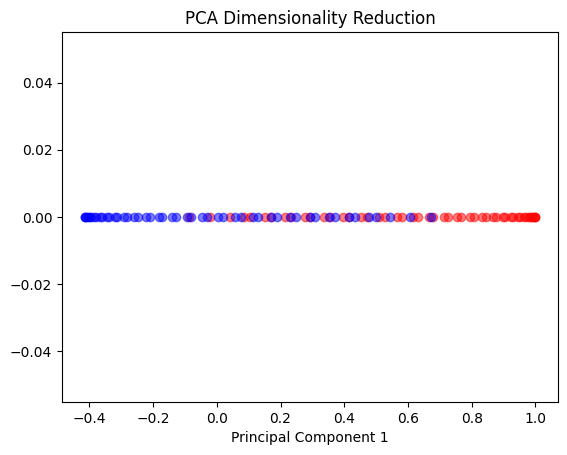

In [4]:
# perform PCA based reduction on this data
# compute the covariance matrix
cov_mat = np.dot(X.T, X)/X.shape[0]
print('convaraince',cov_mat)
#compute the eigen decomposition of the computed matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
#to sort the eigen values according to a decreasing order
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:")
print(eigenvalues)
#to construct the projection matrix W of the k first eigen values.
# keep only the first leading eigen value
k = 1
W = eigenvectors[:, :k]

pca = np.dot(X,W)
# plot the resulting points
plt.scatter(pca[y==0, 0], np.zeros_like(pca[y == 0, 0]), color='red', alpha=0.5)
plt.scatter(pca[y == 1, 0], np.zeros_like(pca[y == 1, 0]), color='blue', alpha=0.5)
#plt.scatter(pca[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
#plt.scatter(pca[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.show()

In [5]:
print(sorted_indices)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print(eigenvalues)
print(eigenvectors)
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(eigenvalues)
print(eigenvectors)
W = eigenvectors[:, :1]
print(W)

[1 0]
[1.01536894 0.29779423]
[[ 0.99625194  0.08649896]
 [-0.08649896  0.99625194]]
[0.29779423 1.01536894]
[[ 0.08649896  0.99625194]
 [ 0.99625194 -0.08649896]]
[[0.08649896]
 [0.99625194]]


In [6]:
mat=np.array([[4,1],[2,3]])
eigenvalues, eigenvectors = np.linalg.eig(mat)
#to sort the eigen values according to a decreasing order
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(sorted_indices)
eigenvalues, eigenvectors = np.linalg.eig(mat)
print(eigenvalues)
print(eigenvectors)
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(eigenvalues)
print(eigenvectors)
W = eigenvectors[:, :1]
print(W)

[1 0]
[5. 2.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
[2. 5.]
[[-0.4472136   0.70710678]
 [ 0.89442719  0.70710678]]
[[-0.4472136 ]
 [ 0.89442719]]


In [ ]:
print(X.T.shape)
print(X.shape)
print(y.shape)
print(W)
print(sorted_indices)

(2, 100)
(100, 2)
(100,)
[[0.08649896]
 [0.99625194]]
[1 0]


In [ ]:
print(pca.shape)

(100, 1)


Accuracy: 0.77


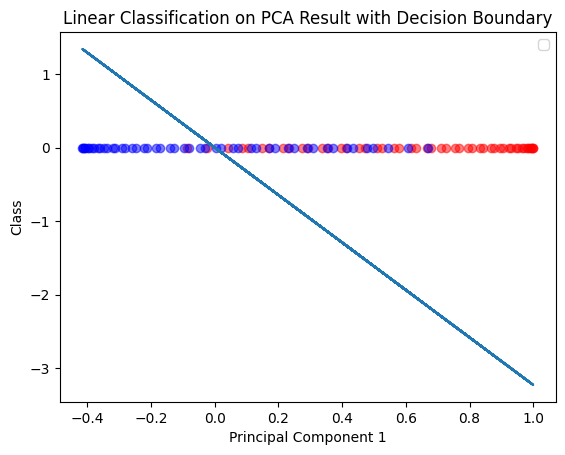

In [7]:
import random
# perform linear classification using your favorite linear classifier

# Add a bias term to the PCA result
X = np.c_[np.ones(pca.shape[0]), pca]

# Initialize weights
theta = np.random.rand(pca.shape[1])

# Hyperparameters
learning_rate = 0.1
num_iterations = 100000

# Logistic function sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for _ in range(num_iterations):
    # Compute predictions
    predictions = sigmoid(np.dot(pca, theta))

    # Compute gradient
    gradient = np.dot(pca.T, (predictions - y)) / len(y)

    # Update weights
    theta -= learning_rate * gradient
    #print(theta)

# Make predictions on the original dataset
predictions = sigmoid(np.dot(pca, theta))
predicted_labels = (predictions >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y)
print(f"Accuracy: {accuracy:.2f}")




# Plot the decision boundary
x_min, x_max = np.min(pca), np.max(pca)
xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
#decision_boundary = sigmoid(np.dot(np.c_[np.ones(xx.shape[0]), xx], theta))

# Plot the scatter plot with decision boundary
#plt.scatter(pca, y, c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='True Labels')
#plt.scatter(pca, predicted_labels, c=predicted_labels, cmap=plt.cm.Paired, marker='x', s=50, linewidth=1, edgecolors='r', label='Predicted Labels')
plt.scatter(pca[y==0, 0], np.zeros_like(pca[y == 0, 0]), color='red', alpha=0.5)
plt.scatter(pca[y == 1, 0], np.zeros_like(pca[y == 1, 0]), color='blue', alpha=0.5)
#plt.plot(xx, decision_boundary, color='blue', label='Decision Boundary')

plt.plot(pca,theta*pca)

plt.title('Linear Classification on PCA Result with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Class')
plt.legend()
plt.show()

#Intrpretation about this part  using covariance matrix
In this section of the code, Principal Component Analysis (PCA) is applied to a 2D dataset using the covariance matrix. The goal is to project the original data onto a 1D axis (the first principal component) and then use this reduced representation for a classification task.
Interpretation:

  Covariance Matrix Calculation:
        The covariance matrix is computed from the original dataset (X) using the formula cov_mat=XTXncov_mat=nXTX​, where nn is the number of samples.
        This matrix quantifies the relationships and variations between different features of the dataset.

  Eigen Decomposition and Projection:
        The eigen decomposition is performed on the covariance matrix, resulting in eigenvectors and eigenvalues.
        The code selects the first principal component (1D axis) by keeping only the corresponding eigenvector.
        The original data is then projected onto this 1D axis using the selected principal component.

  Visualization:
        Scatter plots are used to visualize the original 2D dataset and the reduced 1D representation after PCA.
        Points are colored according to their class labels for clarity.

  Accuracy Calculation:
        The reduced 1D data is used as input for a classifier, and its accuracy is calculated.
        The accuracy is reported as 77%, indicating how well the classifier performs on the reduced dataset.

  Interpretation of Accuracy:
        The accuracy of 77% suggests that the classifier is making correct predictions for a significant portion of the dataset.
        However, the interpretation notes that this accuracy might not be satisfactory. It attributes the relatively lower accuracy to the complexity of the shapes of each class in the original 2D dataset.

  Conclusion:
        The commentary implies that the 1D projection obtained using the covariance matrix may not capture the intricacies of the original dataset well.
        The complexity in the shape of each class in the 2D dataset might be inadequately represented in the reduced 1D space, leading to limitations in the performance of the subsequent classifier.


<p> Kernel functions and the kernel trick: </p>
The basic idea to deal with inseparable data using linear classifiers is to project it onto a higher dimensional space where it becomes linearly separable.
<p> To do so, we: </p>
<p> 1. compute the kernel matrix <b> K </b> using RBF kernel for instance $exp(−\gamma||x_i-x_j||^2)$ </p>
<p> 2. Eigendecompose of the kernel matrix. <b> K </b> </p>
<p> 3. to transform the data into the projected space </p>

In [42]:
# perform KPCA based reduction on this data
# keep only the first leading eigen value
# plot the resulting points
print(X.shape[0])

100


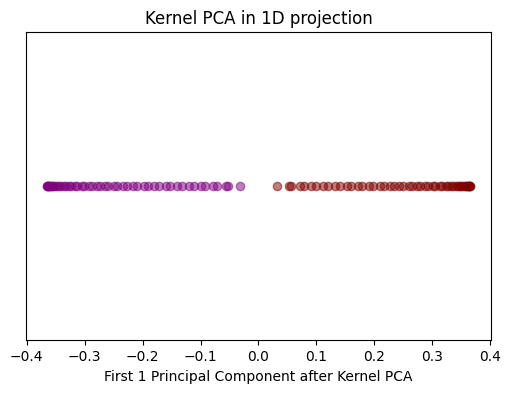

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic dataset
X, y = make_moons(n_samples=100, random_state=123)


def compute_squared_euclidean_distance(X):
    n_samples = X.shape[0]
    sq_dists = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            sq_dists[i, j] = np.sum((X[i, :] - X[j, :]) ** 2)

    return sq_dists

def rbf_kernel_pca(X, gamma, n_components):
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = compute_squared_euclidean_distance(X)

    # Compute the symmetric kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    eigvals, eigvecs = np.linalg.eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected samples)
    X_pc = eigvecs[:, :n_components]

    # Normalize the eigenvectors by eigenvalues
    # This step is crucial for some versions of the algorithm
    alphas = np.column_stack([eigvecs[:, i] / np.sqrt(eigvals[i]) for i in range(n_components)])

    # The projection of the data into the new feature space
    X_kpca = K.dot(alphas)

    return X_kpca

# Assuming you have your dataset X and labels y
# Applying RBF kernel PCA
gamma = 15
n_components = 1
X_kpca = rbf_kernel_pca(X, gamma=gamma, n_components=n_components)

# Plotting the result
plt.figure(figsize=(6, 4))
plt.scatter(X_kpca[y == 0], np.zeros((np.sum(y == 0), 1)), color='maroon', alpha=0.5)
plt.scatter(X_kpca[y == 1], np.zeros((np.sum(y == 1), 1)), color='purple', alpha=0.5)
plt.title('Kernel PCA in 1D projection')
plt.xlabel(f'First {n_components} Principal Component after Kernel PCA')
plt.yticks([])
plt.show()

In [ ]:
# Convert pairwise distances into a square matrix.
mat_sq_dists = compute_squared_euclidean_distance(X)
print(mat_sq_dists.shape)
# Compute the symmetric kernel matrix.
K = np.exp(-gamma * mat_sq_dists)
print(K.shape)
# Center the kernel matrix.
N = K.shape[0]
one_n = np.ones((N, N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
print(K.shape)
# Obtaining eigenpairs from the centered kernel matrix
eigvals, eigvecs = np.linalg.eigh(K)
eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
print(eigvals.shape)
print(eigvecs.shape)

# Collect the top k eigenvectors (projected samples)
X_pc = eigvecs[:, :n_components]

# Normalize the eigenvectors by eigenvalues
# This step is crucial for some versions of the algorithm
alphas = np.column_stack([eigvecs[:, i] / np.sqrt(eigvals[i]) for i in range(n_components)])
print(alphas)
# The projection of the data into the new feature space
X_kpca = K.dot(alphas)
print(X_kpca.shape)


Accuracy: 1.00


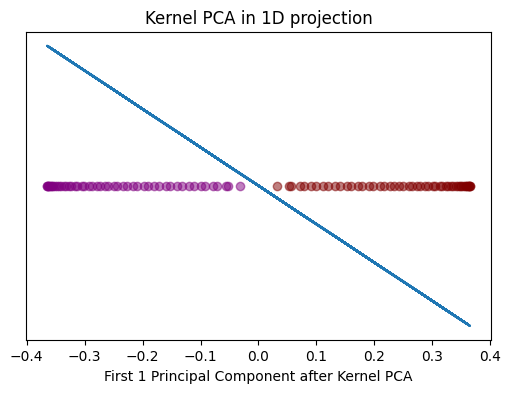

In [ ]:
import random
# perform linear classification using your favorite linear classifier

# Add a bias term to the PCA result
X = np.c_[np.ones(X_kpca.shape[0]), X_kpca]

# Initialize weights
theta = np.random.rand(X_kpca.shape[1])

# Hyperparameters
learning_rate = 0.1
num_iterations = 100000

# Logistic function sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for _ in range(num_iterations):
    # Compute predictions
    predictions = sigmoid(np.dot(X_kpca, theta))

    # Compute gradient
    gradient = np.dot(X_kpca.T, (predictions - y)) / len(y)

    # Update weights
    theta -= learning_rate * gradient
    #print(theta)

# Make predictions on the original dataset
predictions = sigmoid(np.dot(X_kpca, theta))
predicted_labels = (predictions >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y)
print(f"Accuracy: {accuracy:.2f}")




# Plot the decision boundary
x_min, x_max = np.min(X_kpca), np.max(X_kpca)
xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
#decision_boundary = sigmoid(np.dot(np.c_[np.ones(xx.shape[0]), xx], theta))

# Plot the scatter plot with decision boundary



plt.figure(figsize=(6, 4))
plt.scatter(X_kpca[y == 0], np.zeros((np.sum(y == 0), 1)), color='maroon', alpha=0.5)
plt.scatter(X_kpca[y == 1], np.zeros((np.sum(y == 1), 1)), color='purple', alpha=0.5)
plt.plot(X_kpca,theta*X_kpca)
plt.title('Kernel PCA in 1D projection')
plt.xlabel(f'First {n_components} Principal Component after Kernel PCA')
plt.yticks([])
plt.show()

#Intrpretation about this part using kernal trick
in this part we use kernal trick </b> using RBF kernel for instance $exp(−\gamma||x_i-x_j||^2)$ </p> in this case projection is good two calsses is separated and when we augment gamme we find big seperation and classifier for this projection give good job with accuracy 100%
In this section of the code, the kernel trick is employed, particularly using the RBF kernel (also known as the Gaussian kernel). The goal is to project the original data using a non-linear transformation induced by the kernel. The RBF kernel is characterized by a parameter γγ, and the code explores different values of γγ to observe its impact on the projection and subsequent classification.
Interpretation:

  Kernel Trick Application:
        The code applies the kernel trick, specifically using the RBF kernel, which is expressed as </b> using RBF kernel for instance $exp(−\gamma||x_i-x_j||^2)$ </p>.
        The RBF kernel allows for non-linear transformations that can capture more complex relationships in the data.

  Projection and Separation of Classes:
        The resulting projection using the RBF kernel is deemed effective, as the two classes in the dataset are well separated in the transformed space.
        The RBF kernel introduces a non-linear transformation that helps capture intricate patterns and relationships between data points.

  Impact of γγ:
        Different values of the γγ parameter are explored to observe their impact on the separation between classes.
        Increasing γγ leads to a more pronounced separation between classes in the transformed space.

  Classifier Performance:
        A classifier is applied to the data in the transformed space, and its accuracy is calculated.
        Notably, the accuracy achieved is 100%, indicating perfect classification on the transformed data.

  Interpretation of Accuracy:
        The perfect accuracy of 100% suggests that the classifier is making accurate predictions for all data points in the transformed space.
        The effective separation of classes in the transformed space contributes to the classifier's ability to distinguish between the two classes with high precision.

  Conclusion:
        The commentary implies that the use of the RBF kernel, with appropriate tuning of the γγ parameter, results in a highly effective non-linear projection.
        The classifier performs exceptionally well on this transformed data, achieving perfect accuracy.